In [49]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns
import numpy as np

In [22]:
%matplotlib inline

AxesSubplot(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


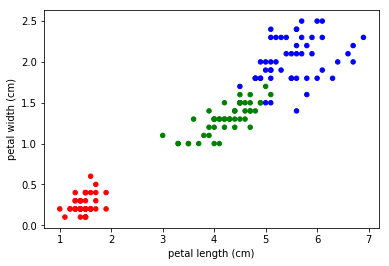

In [27]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {0: 'r', 1: 'g', 2: 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[x]) 
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()

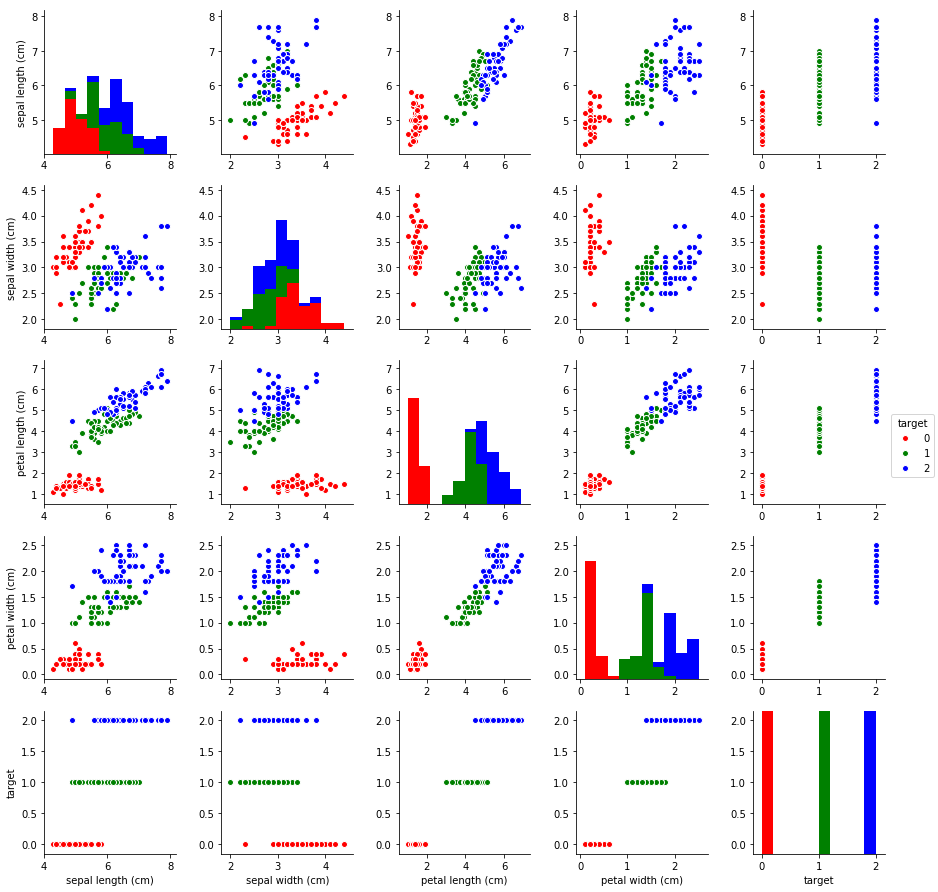

In [28]:
# tip: use seabord pairplot for scatter plots for all independent variables
sns.pairplot(irisdf, hue="target", palette=cmap)

AxesSubplot(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


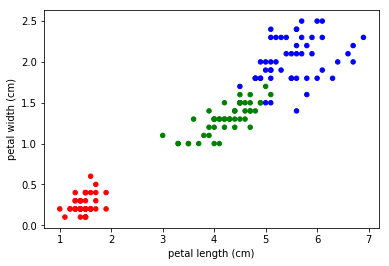

In [18]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)]) 
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()

def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

In [19]:
predictions

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int64

In [24]:
irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

# without float, calc will yield 0

0.666666666667


In [25]:
(irisdf.predictions == irisdf.target).sum()/float(len(irisdf))

0.66666666666666663

### Starter Code

Work on improving the classifier below.

In [31]:
# add a new threshold
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 4.8:
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.953333333333


In [32]:
# add another variable, aka petal width
# cutoff values can be found in: irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)

def my_classifier(row):
    if (row['petal length (cm)'] < 2) and (row['petal width (cm)'] < 0.7):
        return 0
    elif row['petal length (cm)'] < 4.9 and (row['petal width (cm)'] < 1.8):
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.96


### Using distance: KNN implementation

In [39]:
irisdf[['petal length (cm)','petal width (cm)']].head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [43]:
cols = ['petal length (cm)','petal width (cm)']

In [44]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

# iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(irisdf[cols], irisdf.target)
# print knn.predict(irisdf[['petal length (cm)','petal width (cm)']])
# print irisdf.target

print knn.score(irisdf[cols], irisdf.target)

0.96


Do we see a change in performance when using the distance weight?

In [47]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(irisdf[cols], irisdf.target)
# print knn.predict(irisdf[cols])
# print irisdf.target

print knn.score(irisdf[cols], irisdf.target)

0.993333333333


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [71]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

# grid_search + KNN

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
params = {'n_neighbors': range(1,30), 'weights':['distance']} #grid_search expects a list, so even 1 element needs the []s
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target) # import all columns, or be selective about the columns you want
gs.grid_scores_
gs.best_score_
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

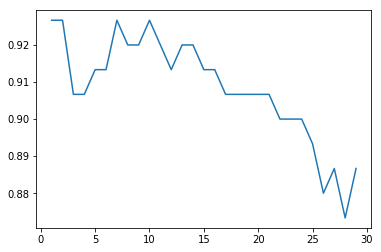

In [68]:
# visualize performance
k = range(1,30)
plt.plot(k,[s[1] for s in  gs.grid_scores_],)
# pick the first one if there are multiple ks being high performer